In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [203]:
well_meta = pd.read_csv('../data/meta.csv')
well_meta['group'] = well_meta.cat.apply(lambda x: x[0])
well_meta.head()

,cat,x,y,group
0,P1,190,190,P
1,P2,190,890,P
2,I1,890,190,I
3,I2,590,770,I
4,I3,670,510,I


In [4]:
data = pd.read_csv('../data/data.csv')
data.head()

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.001621,0.000000,-0.001621,2.000000e+07,1.0,19.0,0.42,False
1,P2,P,0,-0.001903,0.000000,-0.001903,2.000000e+07,1.0,19.0,0.42,False
2,I1,I,0,NaN,0.002533,0.002533,4.018987e+07,1.0,19.0,0.42,False
3,I2,I,0,NaN,0.001267,0.001267,3.665494e+07,1.0,19.0,0.42,False
4,I3,I,0,NaN,NaN,NaN,NaN,0.0,19.0,0.42,False


In [48]:
data[data.is_base][:50]

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
28800,P1,P,0,-0.001621,0.000000,-0.001621,2.000000e+07,1.0,NaN,NaN,True
28801,P2,P,0,-0.001903,0.000000,-0.001903,2.000000e+07,1.0,NaN,NaN,True
28802,I1,I,0,0.000000,0.002533,0.002533,4.018987e+07,1.0,NaN,NaN,True
28803,I2,I,0,0.000000,0.001267,0.001267,3.665494e+07,1.0,NaN,NaN,True
28804,P1,P,1,-0.001502,0.000000,-0.001502,2.000000e+07,1.0,NaN,NaN,True
28805,P2,P,1,-0.001747,0.000000,-0.001747,2.000000e+07,1.0,NaN,NaN,True
28806,I1,I,1,0.000000,0.002533,0.002533,4.024292e+07,1.0,NaN,NaN,True
28807,I2,I,1,0.000000,0.001267,0.001267,3.666387e+07,1.0,NaN,NaN,True
28808,P1,P,2,-0.001493,0.000000,-0.001493,2.000000e+07,1.0,NaN,NaN,True
28809,P2,P,2,-0.001725,0.000000,-0.001725,2.000000e+07,1.0,NaN,NaN,True


In [35]:
p_data = data[data.group == 'P']

print(p_data.start_lag.unique())
print(p_data.coef.unique())
print(p_data.cat.unique())

[19. 21. 17. 10. 11. 16. 20. 18.  5.  2.  3.  4. 22. 13. 14. 15. 12. 24.
 23.  8.  1.  6.  7.  9. nan]
[0.42 0.17 0.33 0.67 0.58 0.5  0.25 0.08  nan]
['P1' 'P2']


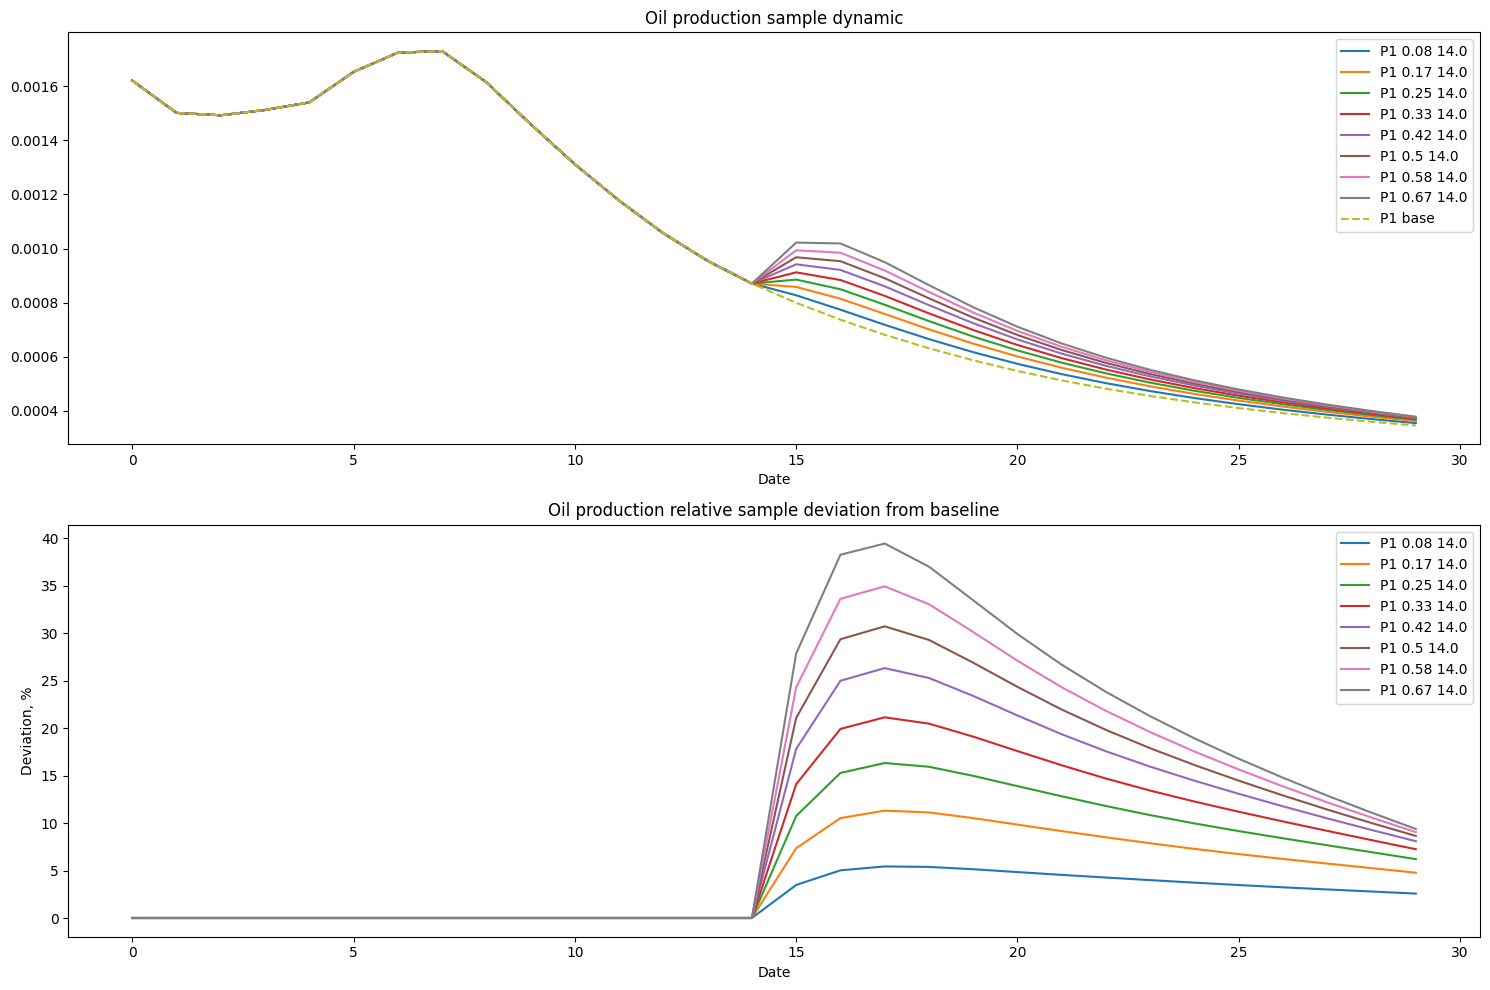

In [101]:
fig, ax = plt.subplots(figsize=(15, 10), 
                       nrows=2, ncols=1,
                       sharex=False,
                       layout='tight')

start_lag_sample = np.random.choice(p_data.start_lag.dropna().unique(), 1)
coef_sample = p_data.coef.dropna().unique()
coef_sample.sort()
cat_sample = np.random.choice(['P1', 'P2'], 1)

for start_lag, coef, well in itertools.product(start_lag_sample, coef_sample, cat_sample):
     data_sample = p_data[(p_data.cat == well) &
                          (p_data.coef == coef) &
                          (p_data.start_lag == start_lag)]
     
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     
     ax[0].plot(data_sample['date'], np.abs(data_sample['oil']), 
              label=f'{well} {coef} {start_lag}')
     
     ax[1].plot(data_sample['date'], ((np.array(base_sample.oil)  - np.array(data_sample.oil)) 
                                      / np.array(- base_sample.oil)) * 100,
                    label=f'{well} {coef} {start_lag}')
     

for well in cat_sample:
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     ax[0].plot(base_sample['date'], np.abs(base_sample['oil']), 
              label=f'{well} base', linestyle='--') 
                          

ax[0].legend()
ax[0].set_title('Oil production sample dynamic')
ax[0].set_xlabel('Date')

ax[1].legend()
ax[1].set_title('Oil production relative sample deviation from baseline')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Deviation, %')

plt.show()

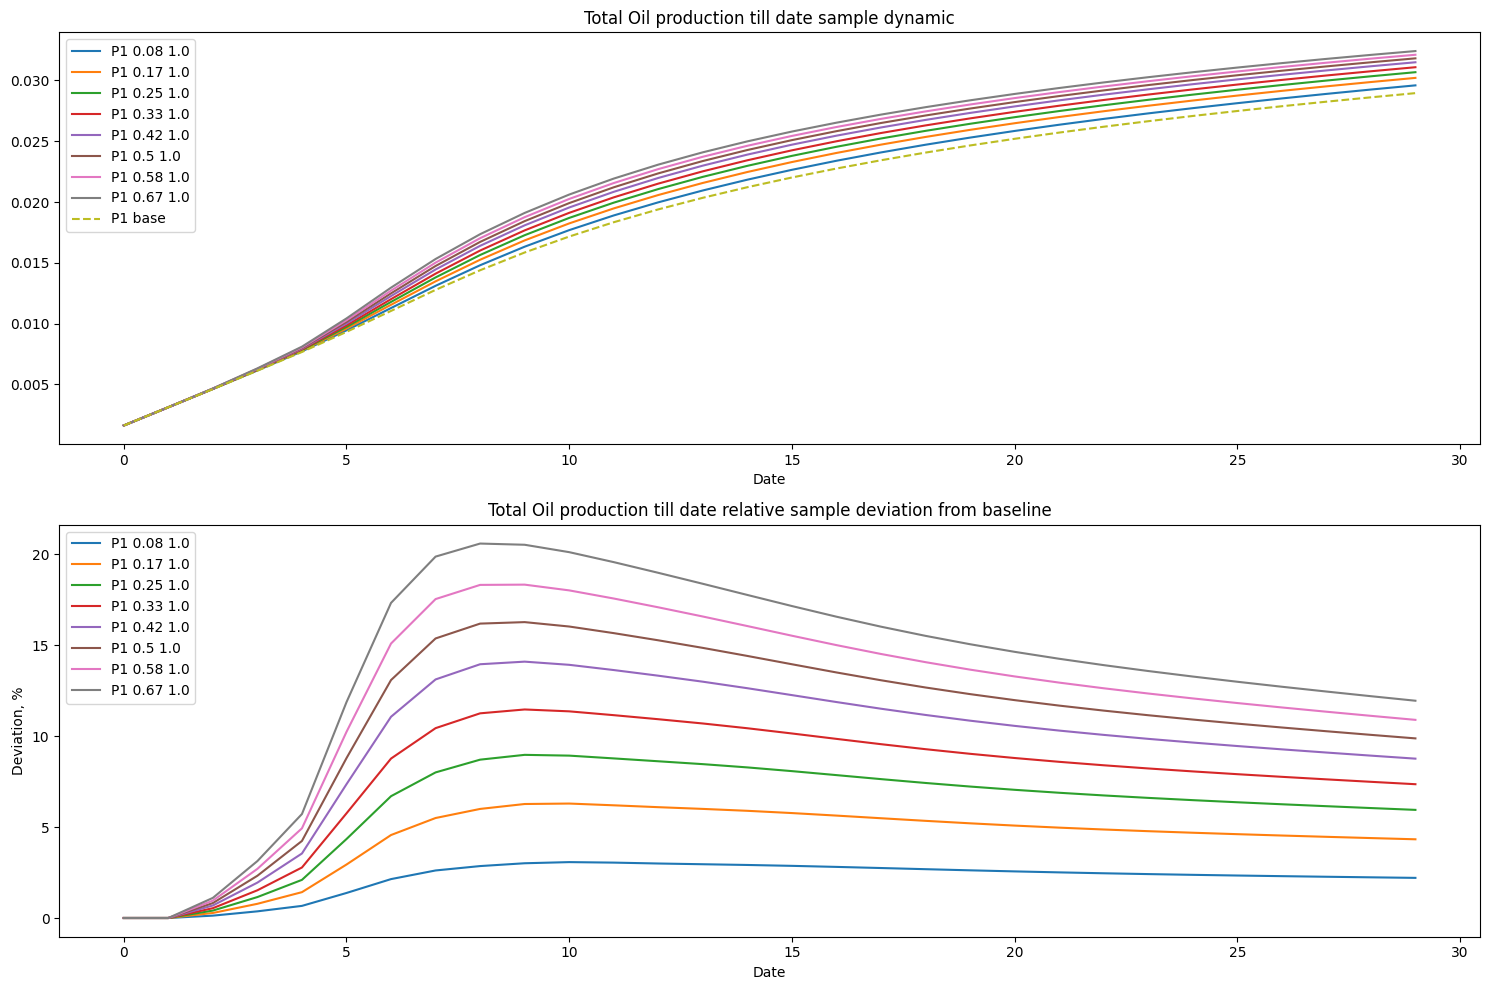

In [111]:
fig, ax = plt.subplots(figsize=(15, 10), 
                       nrows=2, ncols=1,
                       sharex=False,
                       layout='tight')

start_lag_sample = np.random.choice(p_data.start_lag.dropna().unique(), 1)
coef_sample = p_data.coef.dropna().unique()
coef_sample.sort()
cat_sample = np.random.choice(['P1', 'P2'], 1)

for start_lag, coef, well in itertools.product(start_lag_sample, coef_sample, cat_sample):
     data_sample = p_data[(p_data.cat == well) &
                          (p_data.coef == coef) &
                          (p_data.start_lag == start_lag)]
     
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     
     ax[0].plot(data_sample['date'], np.abs(np.cumsum(data_sample['oil'])), 
                label=f'{well} {coef} {start_lag}')
     
     ax[1].plot(data_sample['date'], ((np.cumsum(np.array(base_sample.oil))
                                       - np.cumsum(np.array(data_sample.oil))) 
                                       / np.cumsum(np.array(- base_sample.oil))) * 100,
                    label=f'{well} {coef} {start_lag}')
     

for well in cat_sample:
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     ax[0].plot(base_sample['date'], np.abs(np.cumsum(base_sample['oil'])), 
              label=f'{well} base', linestyle='--') 
                          

ax[0].legend()
ax[0].set_title('Total Oil production till date sample dynamic')
ax[0].set_xlabel('Date')

ax[1].legend()
ax[1].set_title('Total Oil production till date relative sample deviation from baseline')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Deviation, %')

plt.show()

They seem to get to peak deviation depending on start_lag

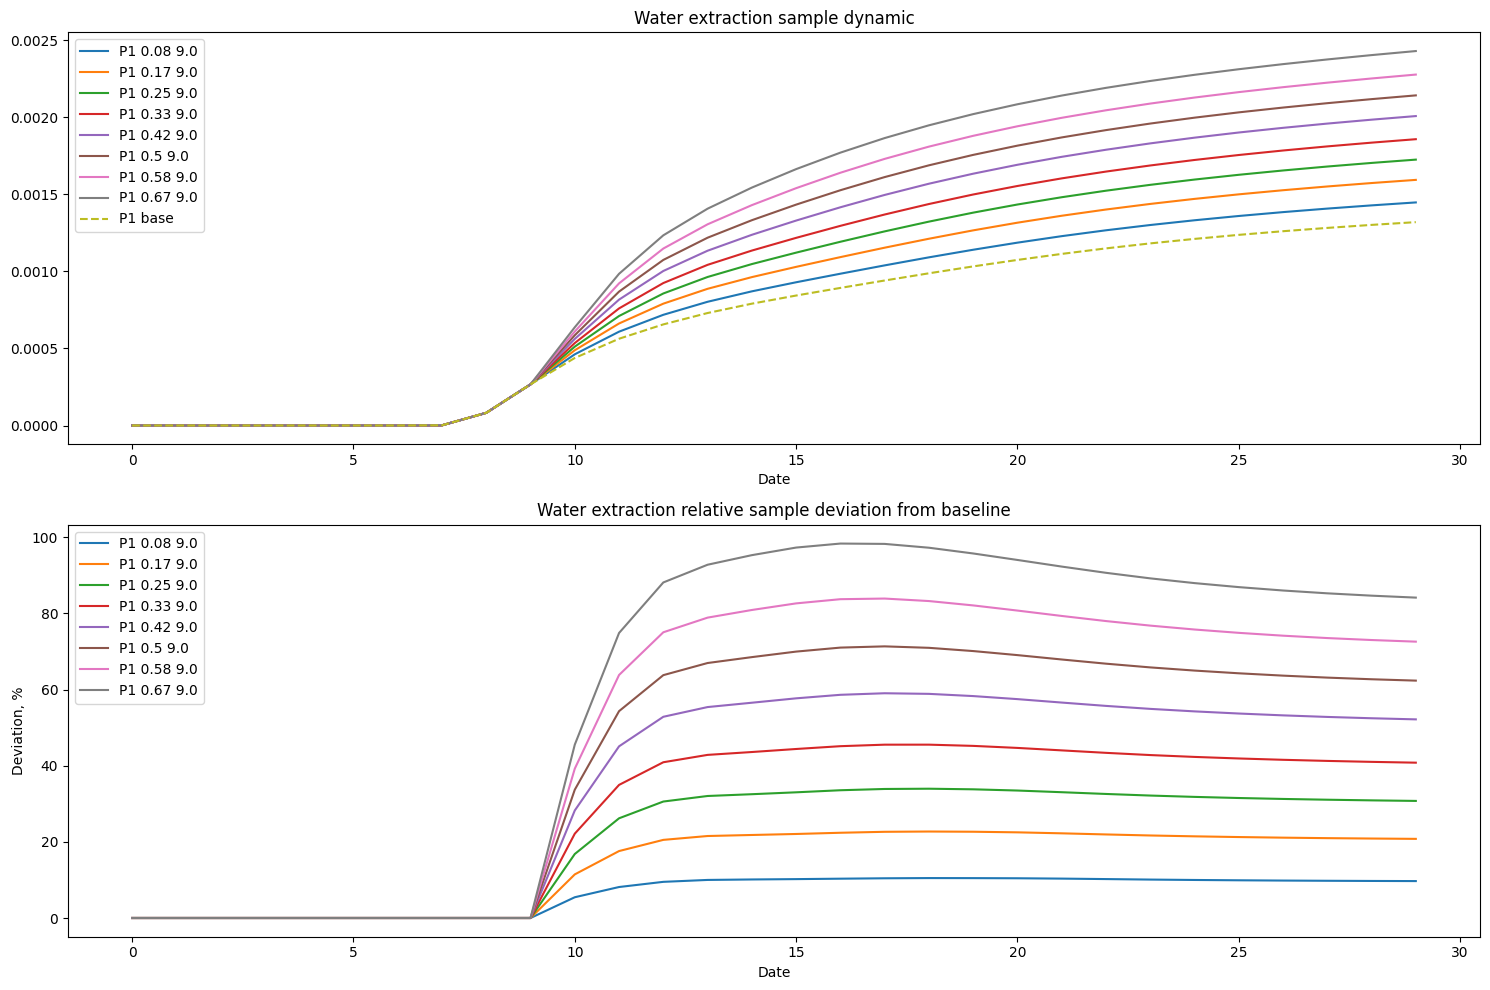

In [126]:
fig, ax = plt.subplots(figsize=(15, 10), 
                       nrows=2, ncols=1,
                       sharex=False,
                       layout='tight')

start_lag_sample = np.random.choice(p_data.start_lag.dropna().unique(), 1)
coef_sample = p_data.coef.dropna().unique()
coef_sample.sort()
cat_sample = np.random.choice(['P1', 'P2'], 1)

for start_lag, coef, well in itertools.product(start_lag_sample, coef_sample, cat_sample):
     data_sample = p_data[(p_data.cat == well) &
                          (p_data.coef == coef) &
                          (p_data.start_lag == start_lag)]
     
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     
     ax[0].plot(data_sample['date'], - data_sample['water'], 
              label=f'{well} {coef} {start_lag}')
     
     ax[1].plot(data_sample['date'], ((np.array(base_sample.water)  - np.array(data_sample.water)) 
                                      / np.array(- base_sample.water + 1e-9)) * 100,
                    label=f'{well} {coef} {start_lag}')
     

for well in cat_sample:
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     ax[0].plot(base_sample['date'], - base_sample['water'], 
              label=f'{well} base', linestyle='--') 
                          

ax[0].legend()
ax[0].set_title('Water extraction sample dynamic')
ax[0].set_xlabel('Date')

ax[1].legend()
ax[1].set_title('Water extraction relative sample deviation from baseline')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Deviation, %')

plt.show()

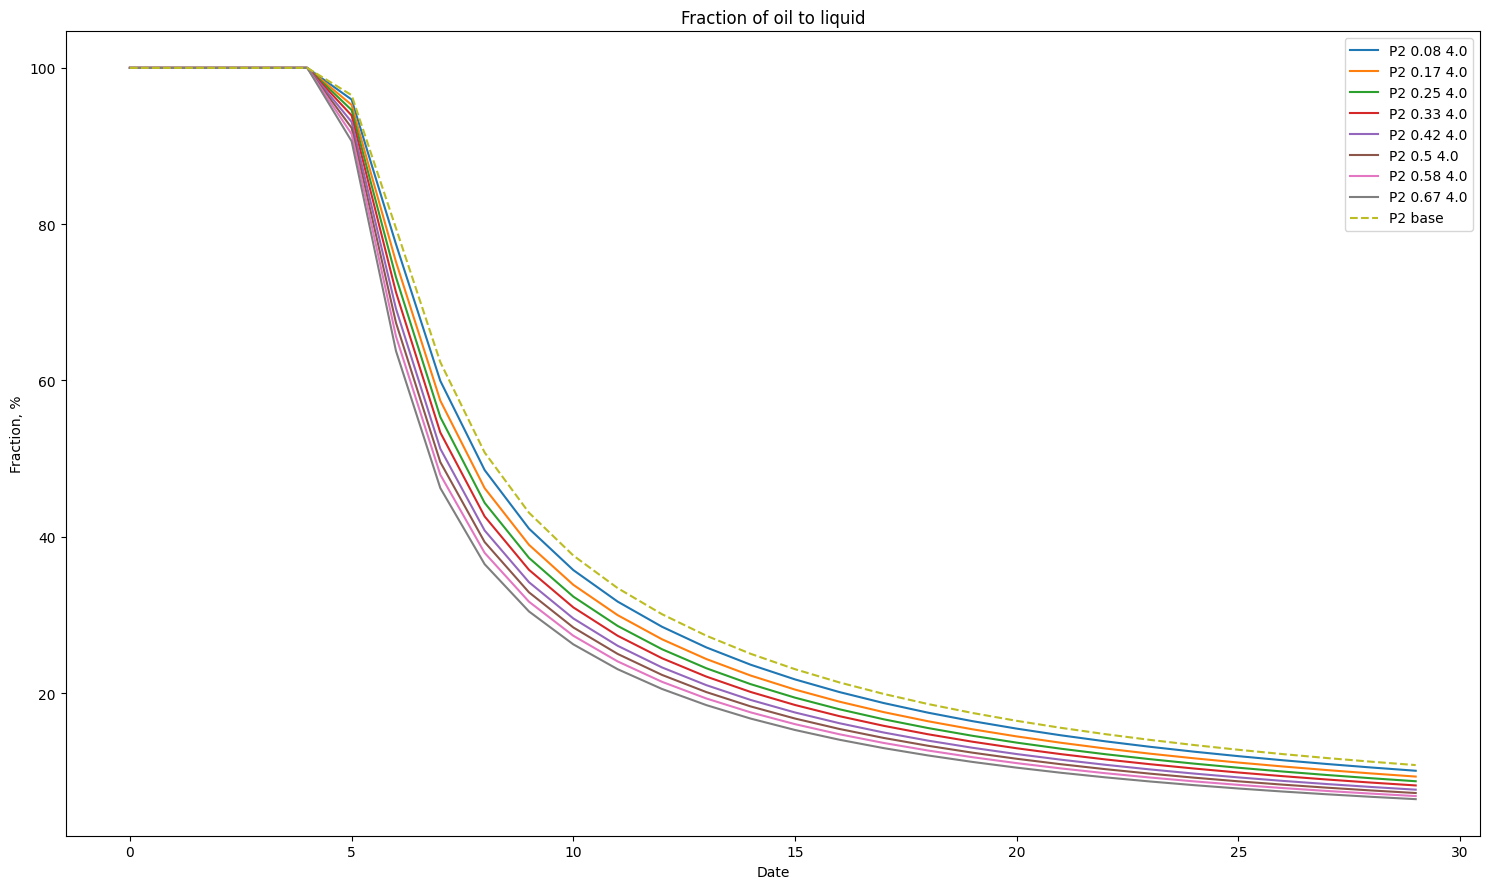

In [132]:
fig, ax = plt.subplots(figsize=(15, 9), 
                       nrows=1, ncols=1,
                       sharex=False,
                       layout='tight')

start_lag_sample = np.random.choice(p_data.start_lag.dropna().unique(), 1)
coef_sample = p_data.coef.dropna().unique()
coef_sample.sort()
cat_sample = np.random.choice(['P1', 'P2'], 1)

for start_lag, coef, well in itertools.product(start_lag_sample, coef_sample, cat_sample):
     data_sample = p_data[(p_data.cat == well) &
                          (p_data.coef == coef) &
                          (p_data.start_lag == start_lag)]
     
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     
     ax.plot(data_sample['date'], data_sample['oil'] / data_sample['liquid'] * 100, 
              label=f'{well} {coef} {start_lag}')
     
for well in cat_sample:
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     ax.plot(base_sample['date'], base_sample['oil'] / base_sample['liquid'] * 100, 
              label=f'{well} base', linestyle='--') 
     
ax.legend()
ax.set_title('Fraction of oil to liquid')
ax.set_xlabel('Date')
ax.set_ylabel('Fraction, %')
plt.show()

In [144]:
i_data = data[data.group == 'I']

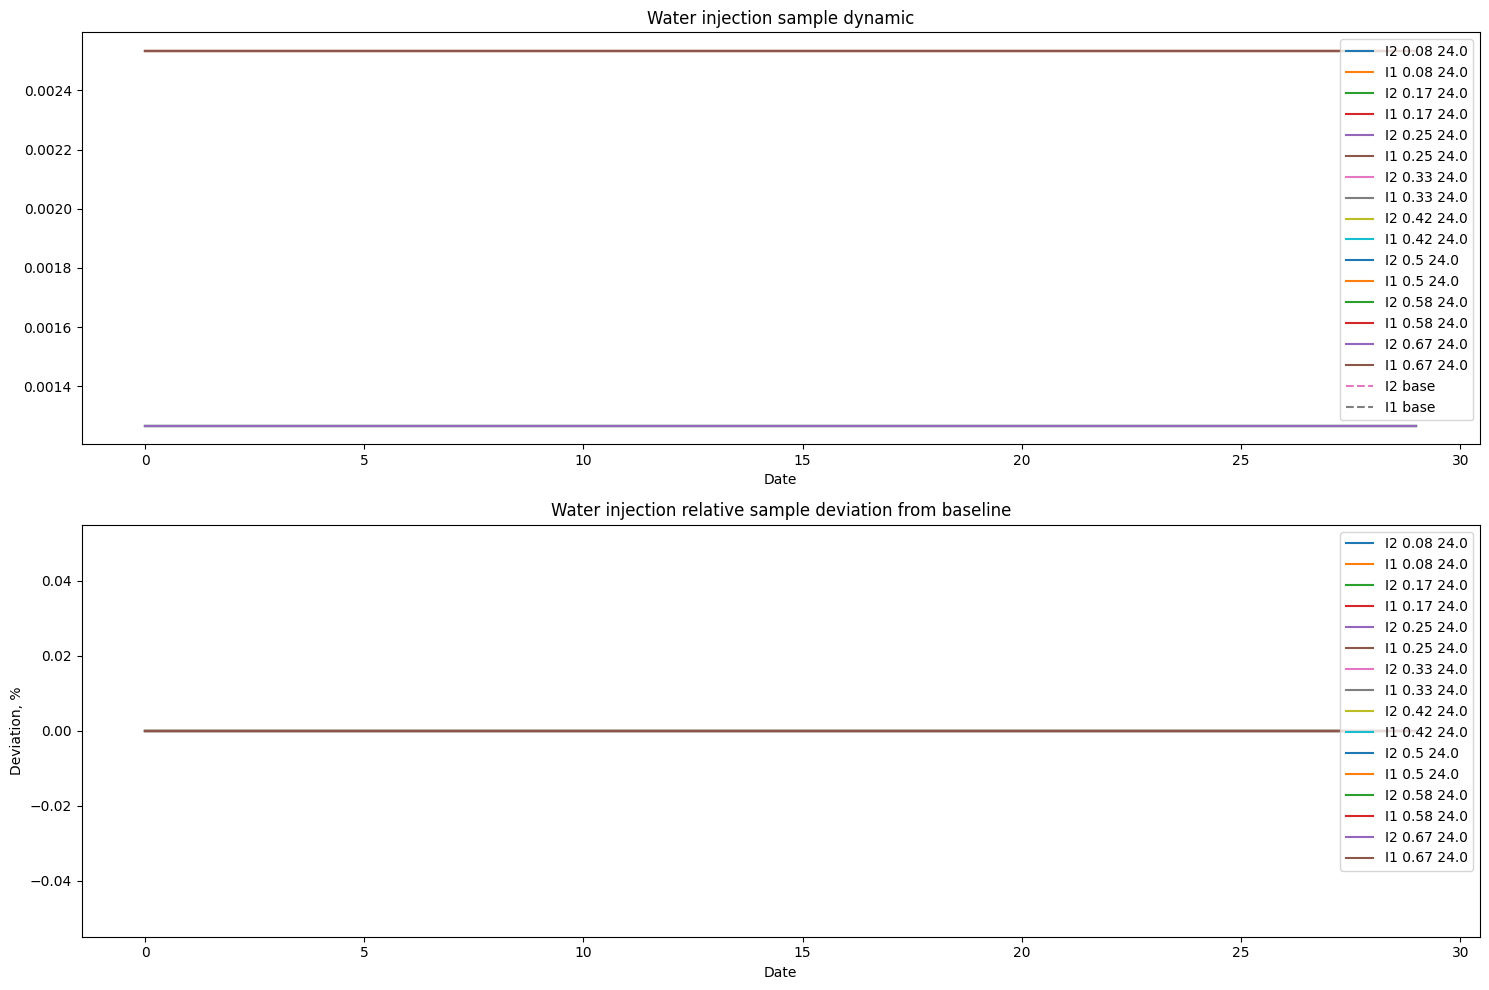

In [155]:
fig, ax = plt.subplots(figsize=(15, 10), 
                       nrows=2, ncols=1,
                       sharex=False,
                       layout='tight')

start_lag_sample = np.random.choice(i_data.start_lag.dropna().unique(), 1)
coef_sample = i_data.coef.dropna().unique()
coef_sample.sort()
cat_sample = np.random.choice(['I1', 'I2'], 2)

for start_lag, coef, well in itertools.product(start_lag_sample, coef_sample, cat_sample):
     data_sample = i_data[(i_data.cat == well) &
                          (i_data.coef == coef) &
                          (i_data.start_lag == start_lag)]
     
     base_sample = i_data[(i_data.cat == well) &
                          (i_data.is_base)]
     
     
     ax[0].plot(data_sample['date'], data_sample['water'], 
              label=f'{well} {coef} {start_lag}')
     
     ax[1].plot(data_sample['date'], ((np.array(base_sample.water)  - np.array(data_sample.water)) 
                                      / np.array(- base_sample.water + 1e-9)) * 100,
                    label=f'{well} {coef} {start_lag}')
     

for well in cat_sample:
     base_sample = p_data[(p_data.cat == well) &
                          (p_data.is_base)]
     
     ax[0].plot(base_sample['date'], base_sample['water'], 
              label=f'{well} base', linestyle='--') 
                          

ax[0].legend()
ax[0].set_title('Water injection sample dynamic')
ax[0].set_xlabel('Date')

ax[1].legend()
ax[1].set_title('Water injection relative sample deviation from baseline')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Deviation, %')

plt.show()

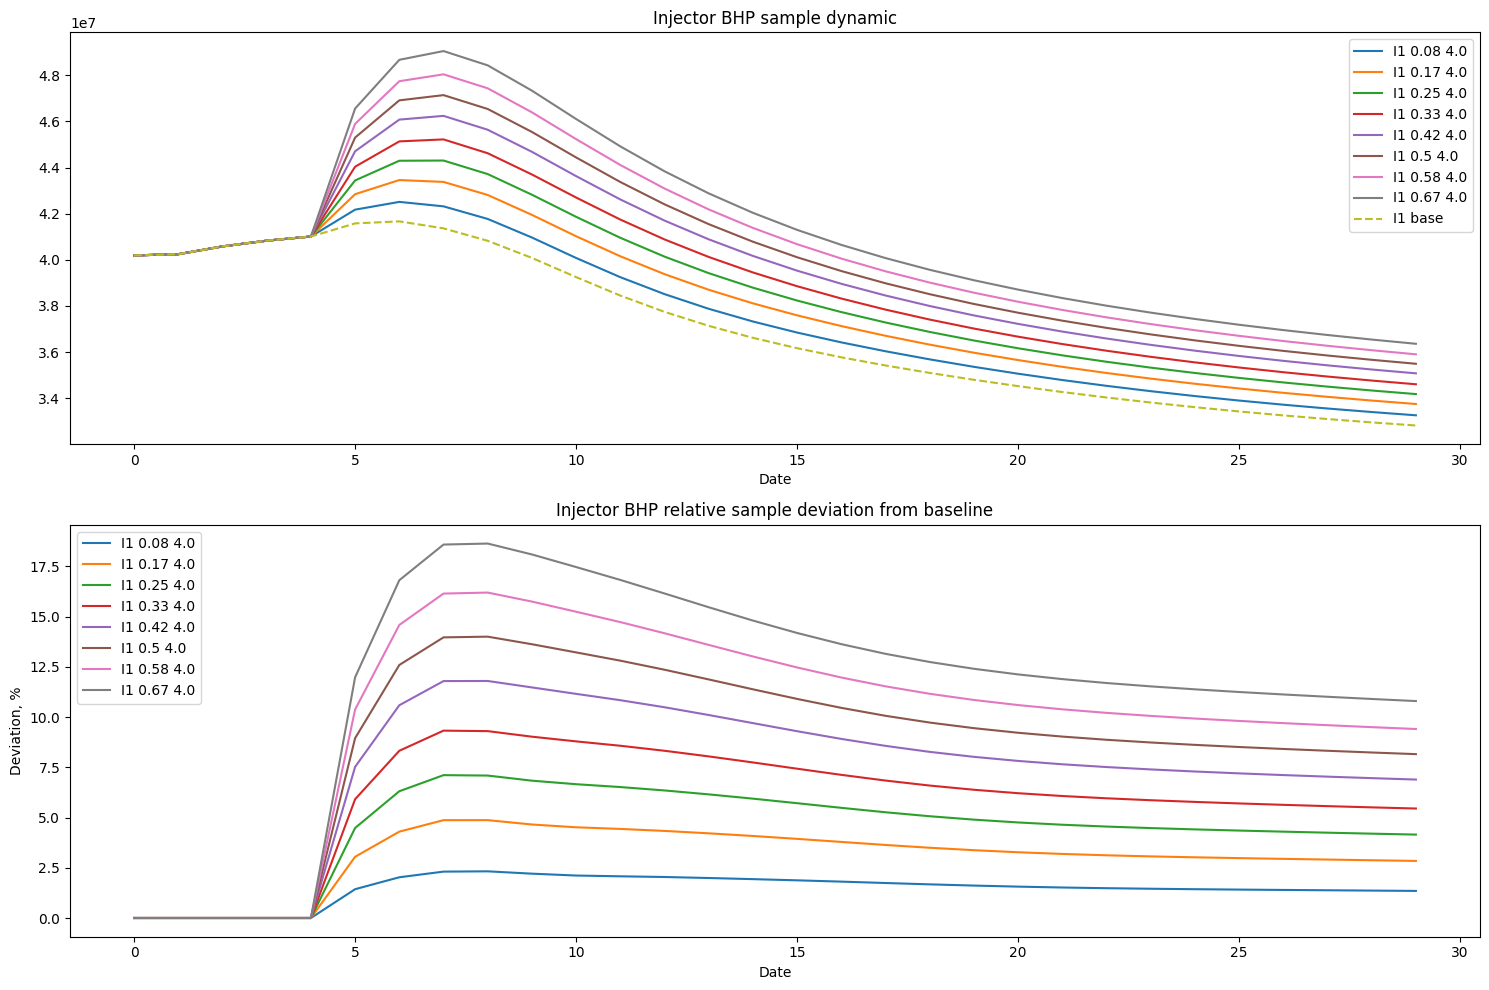

In [201]:
fig, ax = plt.subplots(figsize=(15, 10), 
                       nrows=2, ncols=1,
                       sharex=False,
                       layout='tight')

start_lag_sample = np.random.choice(i_data.start_lag.dropna().unique(), 1)
coef_sample = i_data.coef.dropna().unique()
coef_sample.sort()
cat_sample = np.random.choice(['I1', 'I2'], 1)

for start_lag, coef, well in itertools.product(start_lag_sample, coef_sample, cat_sample):
     data_sample = i_data[(i_data.cat == well) &
                          (i_data.coef == coef) &
                          (i_data.start_lag == start_lag)]
     
     base_sample = i_data[(i_data.cat == well) &
                          (i_data.is_base)]
     
     
     ax[0].plot(data_sample['date'], data_sample['bhp'], 
              label=f'{well} {coef} {start_lag}')
     

     ax[1].plot(data_sample['date'], ((np.array(data_sample.bhp) - np.array(base_sample.bhp)) 
                                      / np.array(base_sample.bhp + 1e-9)) * 100,
                    label=f'{well} {coef} {start_lag}')
     

for well in cat_sample:
     base_sample = i_data[(i_data.cat == well) &
                          (i_data.is_base)]
     
     ax[0].plot(base_sample['date'], base_sample['bhp'], 
              label=f'{well} base', linestyle='--') 
                          

ax[0].legend()
ax[0].set_title('Injector BHP sample dynamic')
ax[0].set_xlabel('Date')

ax[1].legend()
ax[1].set_title('Injector BHP relative sample deviation from baseline')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Deviation, %')

plt.show()

In [172]:
i3_data = data[(data.cat == 'I3') &
               (data.status == 1)]
i3_data

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
104,I3,I,20,NaN,0.001596,0.001596,3.437154e+07,1.0,19.0,0.42,False
109,I3,I,21,NaN,0.001596,0.001596,3.452432e+07,1.0,19.0,0.42,False
114,I3,I,22,NaN,0.001596,0.001596,3.435116e+07,1.0,19.0,0.42,False
119,I3,I,23,NaN,0.001596,0.001596,3.408541e+07,1.0,19.0,0.42,False
124,I3,I,24,NaN,0.001596,0.001596,3.380832e+07,1.0,19.0,0.42,False
...,...,...,...,...,...,...,...,...,...,...,...
28779,I3,I,25,NaN,0.000304,0.000304,2.879834e+07,1.0,9.0,0.08,False
28784,I3,I,26,NaN,0.000304,0.000304,2.862721e+07,1.0,9.0,0.08,False
28789,I3,I,27,NaN,0.000304,0.000304,2.846977e+07,1.0,9.0,0.08,False
28794,I3,I,28,NaN,0.000304,0.000304,2.832448e+07,1.0,9.0,0.08,False


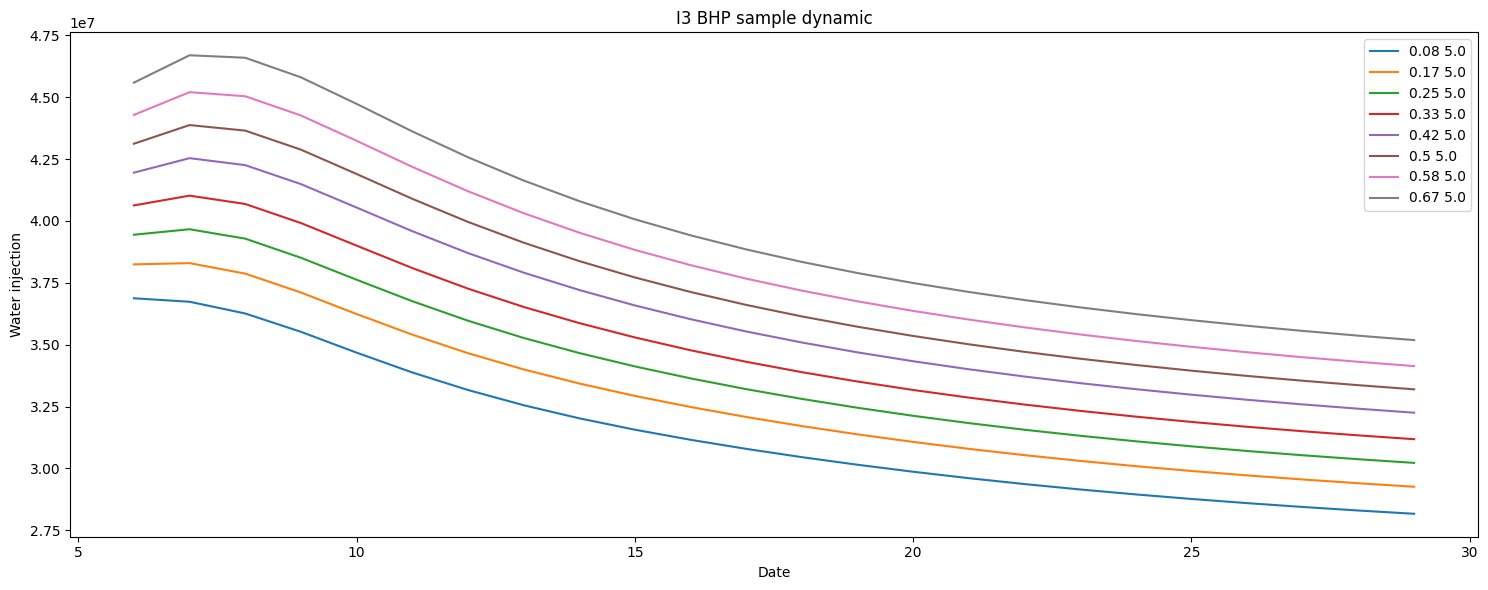

In [177]:
fig, ax = plt.subplots(figsize=(15, 6), 
                       nrows=1, ncols=1,
                       sharex=False,
                       layout='tight')

start_lag_sample = np.random.choice(i_data.start_lag.dropna().unique(), 1)
coef_sample = i_data.coef.dropna().unique()
coef_sample.sort()

for start_lag, coef in itertools.product(start_lag_sample, coef_sample):
        data_sample = i3_data[(i3_data.coef == coef) &
                                (i3_data.start_lag == start_lag)]        

        ax.plot(data_sample['date'], data_sample['bhp'], 
                label=f'{coef} {start_lag}')

ax.legend()
ax.set_title('I3 BHP sample dynamic')
ax.set_xlabel('Date')
ax.set_ylabel('Water injection')

plt.show()

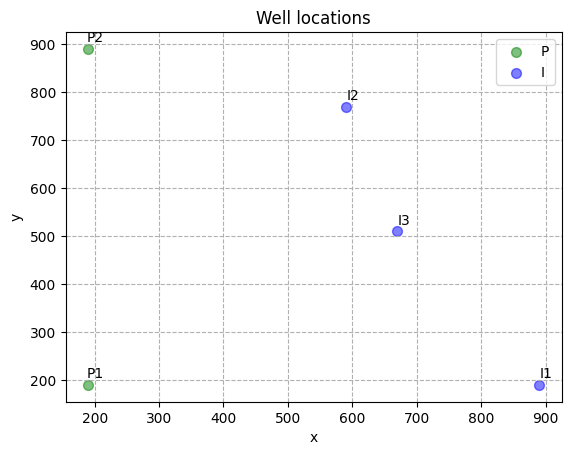

In [205]:
color_dict = {"P": "green", "I": "blue"}

# generate a scatter plot with color-coded points
for group, color in color_dict.items():
    df_cat = well_meta[well_meta["group"] == group]
    plt.scatter(df_cat["x"], df_cat["y"], s=50, alpha=0.5, color=color, label=group)

for i, row in well_meta.iterrows():
    plt.annotate(
        row["cat"],
        (row["x"], row["y"]),
        textcoords="offset points",
        xytext=(5, 5),
        ha="center",
        color="k",  # change the text color to red
    )

# add labels and legend
plt.title("Well locations")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(ls="--")
plt.legend()
plt.show()